GET https://37068574-a210-48cc-b0b2-9175710228d6.deepnoteproject.com/status
Status Code: 200
Response: {'status': 'online'}

POST https://37068574-a210-48cc-b0b2-9175710228d6.deepnoteproject.com/sensors
Add Sensor Status: 200

GET https://37068574-a210-48cc-b0b2-9175710228d6.deepnoteproject.com/data/26:99:64:91:45:14 with params {'count': 10}
Data Retrieved Successfully!

Data Preview:
                timestamp  temperature  humidity
0 2025-12-19 14:22:02.843           20        57
1 2025-12-19 14:22:08.098           20        57
2 2025-12-19 14:22:13.353           20        58
3 2025-12-19 14:22:18.607           20        58
4 2025-12-19 14:22:23.862           20        58


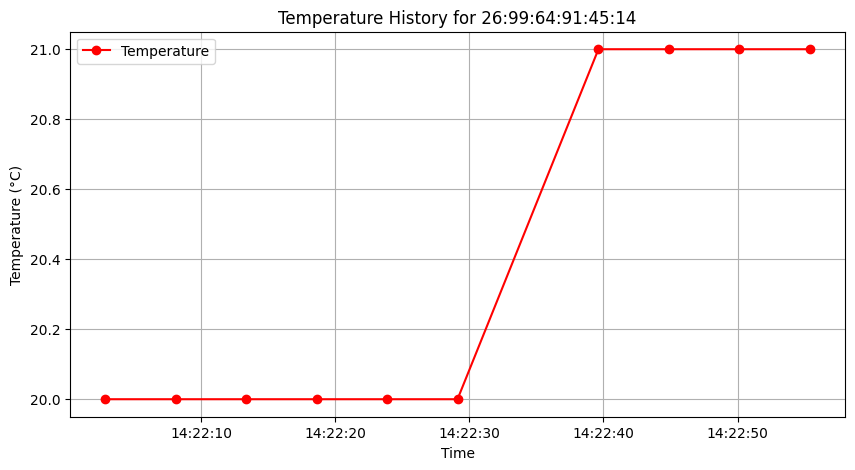

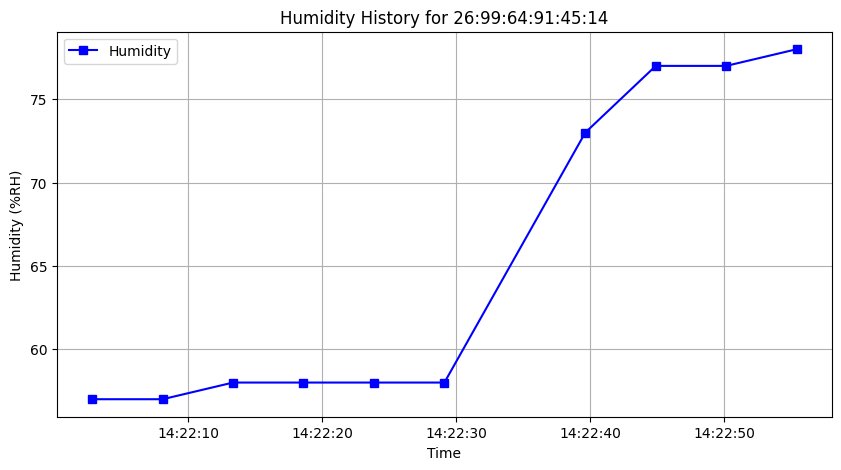

In [ ]:
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt


BASE_URL = "" 

MY_MAC = ""

# Check Status 
try:
    url = f"{BASE_URL}/status"
    print(f"GET {url}")
    response = requests.get(url)
    print("Status Code:", response.status_code)
    print("Response:", response.json())
except Exception as e:
    print("Error connecting to server. Is rest_server.ipynb running?", e)

# Adding sensor 
# register mac address to the database
url = f"{BASE_URL}/sensors"
payload = {"mac_address": MY_MAC}

print(f"\nPOST {url}")
response = requests.post(url, json=payload)
print("Add Sensor Status:", response.status_code)

# Getting the previous data, 10 most recent
url = f"{BASE_URL}/data/{MY_MAC}"
params = {"count": 10}

print(f"\nGET {url} with params {params}")
response = requests.get(url, params=params)

if response.status_code == 200:
    data = response.json()
    print("Data Retrieved Successfully!")
    
    # For visualizing
    df = pd.DataFrame({
        'timestamp': pd.to_datetime(data['timestamp'], unit='ms'),
        'temperature': data['temperature'],
        'humidity': data['humidity']
    })
    
    print("\nData Preview:")
    print(df.head())

    # Timestamp vs Temperature plot
    plt.figure(figsize=(10, 5))
    plt.plot(df['timestamp'], df['temperature'], marker='o', color='red', label='Temperature')
    plt.title(f"Temperature History for {MY_MAC}")
    plt.xlabel("Time")
    plt.ylabel("Temperature (°C)")
    plt.grid(True)
    plt.legend()
    plt.show()

    # Timestamp vs Humidity plot
    plt.figure(figsize=(10, 5))
    plt.plot(df['timestamp'], df['humidity'], marker='s', color='blue', label='Humidity')
    plt.title(f"Humidity History for {MY_MAC}")
    plt.xlabel("Time")
    plt.ylabel("Humidity (%RH)")
    plt.grid(True)
    plt.legend()
    plt.show()
    
else:
    print(f"Failed to retrieve data. Status: {response.status_code}")
    print("Response:", response.text)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=37068574-a210-48cc-b0b2-9175710228d6' target="_blank">

Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>